<a href="https://colab.research.google.com/github/Gaurav-jain-21/Deep-Learning-Projects/blob/main/MINST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import math
import platform
print("Python:", sys.version.splitlines()[0])
print("Platform:", platform.platform())

try:
    import tensorflow as tf
    print("TensorFlow:", tf.__version__)
except Exception as e:
    print("TensorFlow not found:", e)


Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Platform: Linux-6.6.105+-x86_64-with-glibc2.35
TensorFlow: 2.19.0


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# # Example save path: /content/drive/MyDrive/mnist_models/


In [ ]:
#  Load MNIST using TensorFlow / Keras
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Load data: (x_train, y_train), (x_test, y_test)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)


x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_test shape: (10000, 28, 28) y_test shape: (10000,)


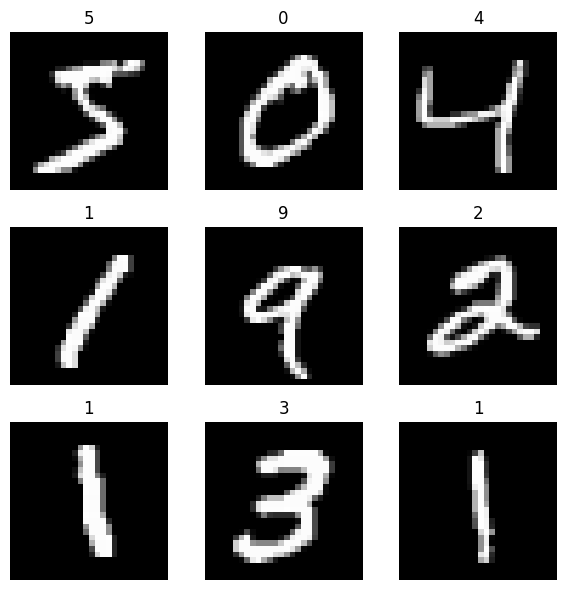

In [ ]:
# Cell 5 — Visualize some samples
import matplotlib.pyplot as plt

def show_images(images, labels=None, n=9):
    plt.figure(figsize=(6,6))
    for i in range(n):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i], cmap='gray')
        if labels is not None:
            plt.title(labels[i])
        plt.axis('off')
    plt.tight_layout()

show_images(x_train, y_train, n=9)


In [ ]:
# Preprocess for a Keras CNN
# Normalize and add channel dimension
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32")  / 255.0

# Add channel dim (batch, height, width, channels)
x_train = np.expand_dims(x_train, -1)  # shape (60000,28,28,1)
x_test  = np.expand_dims(x_test, -1)

# One-hot not necessary if using sparse_categorical_crossentropy
num_classes = 10
print("After preprocessing shapes:", x_train.shape, x_test.shape)


After preprocessing shapes: (60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
#Build a simple CNN (Keras Sequential)
from tensorflow.keras import layers, models

def make_simple_cnn(input_shape=(28,28,1), num_classes=10):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=3, activation='relu'),
        layers.MaxPooling2D(pool_size=2),
        layers.Conv2D(64, kernel_size=3, activation='relu'),
        layers.MaxPooling2D(pool_size=2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model = make_simple_cnn()
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#  Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # using integer labels
    metrics=['accuracy']
)


In [ ]:
#Train the model (fit)
# Use a validation split; reduce epochs if you just want a quick run
history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=5,
    batch_size=128,
    verbose=2
)


Epoch 1/5
422/422 - 9s - 23ms/step - accuracy: 0.9153 - loss: 0.2745 - val_accuracy: 0.9825 - val_loss: 0.0591
Epoch 2/5
422/422 - 2s - 4ms/step - accuracy: 0.9749 - loss: 0.0834 - val_accuracy: 0.9862 - val_loss: 0.0470
Epoch 3/5
422/422 - 2s - 4ms/step - accuracy: 0.9810 - loss: 0.0621 - val_accuracy: 0.9897 - val_loss: 0.0385
Epoch 4/5
422/422 - 2s - 4ms/step - accuracy: 0.9850 - loss: 0.0509 - val_accuracy: 0.9892 - val_loss: 0.0378
Epoch 5/5
422/422 - 2s - 5ms/step - accuracy: 0.9874 - loss: 0.0407 - val_accuracy: 0.9902 - val_loss: 0.0333


In [ ]:
#Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}")


313/313 - 2s - 7ms/step - accuracy: 0.9902 - loss: 0.0293
Test loss: 0.0293, Test accuracy: 0.9902


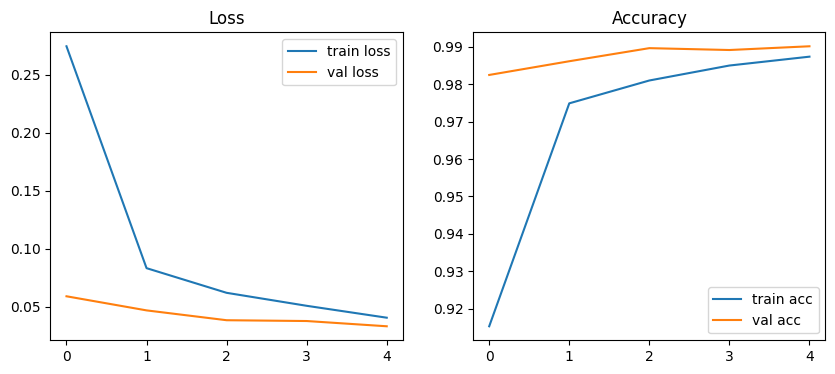

In [ ]:
# Plot training history
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend(); plt.title('Loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend(); plt.title('Accuracy')
plt.show()


In [ ]:
# Save the model to Drive (or local Colab /content)
save_path = '/content/drive/MyDrive/mnist_models/simple_cnn_mnist.h5'
model.save(save_path)
print("Saved model to:", save_path)


Saved model to: /content/drive/MyDrive/mnist_models/simple_cnn_mnist.h5


In [ ]:
# Load the model back (example)
from tensorflow.keras.models import load_model
loaded = load_model(save_path)
loaded.evaluate(x_test, y_test, verbose=2)


313/313 - 2s - 7ms/step - accuracy: 0.9902 - loss: 0.0293


[0.029289983212947845, 0.9901999831199646]

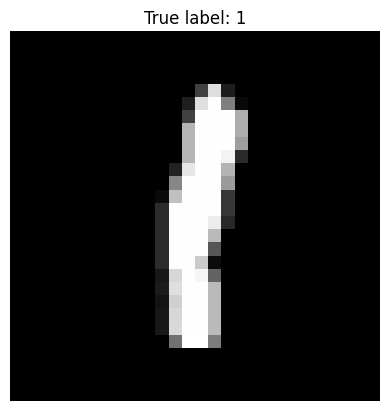

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step
Predicted label: 1 confidence: 0.9998495578765869


In [ ]:
# Inference on custom images (example)
# We'll take a test image, show it, and predict:
i = np.random.randint(1,100)  # change index to any 0..len(x_test)-1
img = x_test[i]  # shape (28,28,1), normalized
plt.imshow(img.squeeze(), cmap='gray')
plt.axis('off')
plt.title(f"True label: {y_test[i]}")
plt.show()

pred = loaded.predict(img[np.newaxis, ...])  # add batch dim
pred_label = np.argmax(pred, axis=1)[0]
print("Predicted label:", pred_label, "confidence:", float(np.max(pred)))


Saving Screenshot 2025-11-27 230028.png to Screenshot 2025-11-27 230028.png
Uploaded: Screenshot 2025-11-27 230028.png


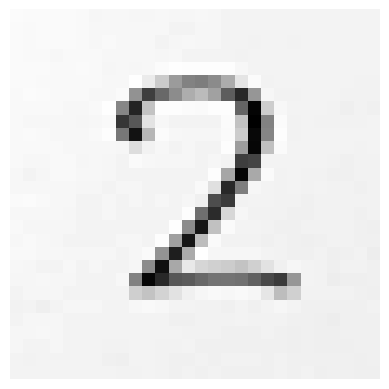

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted digit: 0 confidence: 0.39444369077682495


In [ ]:
# If you want to upload a local image file (PNG/JPG), use this cell. Colab's file upload UI appears.
from google.colab import files
from PIL import Image

uploaded = files.upload()  # choose an image file from your machine
# After upload, process first file:
filename = list(uploaded.keys())[0]
print("Uploaded:", filename)

# Load, convert to grayscale, resize to 28x28, invert if needed, normalize:
img = Image.open(filename).convert('L').resize((28,28))
arr = np.array(img).astype('float32') / 255.0
arr = np.expand_dims(arr, -1)  # add channel
plt.imshow(arr.squeeze(), cmap='gray'); plt.axis('off'); plt.show()

pred = loaded.predict(arr[np.newaxis, ...])
pred_label = np.argmax(pred, axis=1)[0]
print("Predicted digit:", pred_label, "confidence:", float(np.max(pred)))
